In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def p_x_given_z(x, z):
    mu = a * z + b
    var = sigma_x ** 2 + beta * np.cosh(w * z + w0)
    p_x = np.exp(-.5 * (x - mu) ** 2 / var) / np.sqrt(2 * np.pi * var)
    return p_x

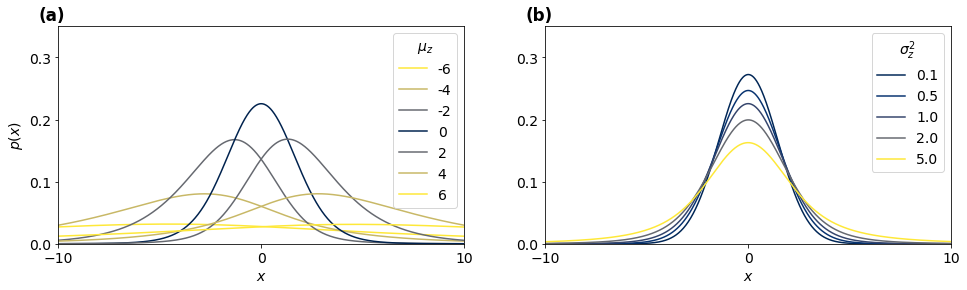

In [25]:
import matplotlib
plt.rc('font', size = 14)
cm = matplotlib.cm.get_cmap('cividis')
mu_z, std_z = 2, 1.
a, b = 1, 0
w, w0 = 1., 0
sigma_x = 1.
beta = 1.

x_range = np.linspace(-10,10,1000)
num_samples = 10000

mu_range = np.arange(-6,7,2)

p_x = np.zeros((len(mu_range), len(x_range)))


fig = plt.figure(figsize=(16,4))
plt.subplot(121)
for imu, mu_z in enumerate(mu_range):
    for isample in range(num_samples):
        z_sample = mu_z + std_z * np.random.randn()
        p_x[imu] += p_x_given_z(x_range, z_sample)
    p_x /= num_samples
    plt.plot(x_range, p_x[imu], color=cm(np.abs(mu_z) / 5.), label=mu_z)
plt.legend(title='$\\mu_z$')
plt.ylabel('$p(x)$')
plt.xlabel('$x$')
plt.xticks([-10,0,10])
plt.yticks([0,.1,.2,.3])
plt.ylim([0,.35])
plt.xlim([-10,10])
plt.title('(a)', loc='left', fontweight='bold', x=-.05)
plt.subplot(122)

sigma_range = [.1,.5,1.,2.,5.]
p_x = np.zeros((len(sigma_range), len(x_range)))
mu_z = 0
for isigma, sigma_z in enumerate(sigma_range):
    for isample in range(num_samples):
        z_sample = mu_z + np.sqrt(sigma_z) * np.random.randn()
        p_x[isigma] += p_x_given_z(x_range, z_sample)
    p_x /= num_samples
    plt.plot(x_range, p_x[isigma], color=cm(np.abs(sigma_z) / 5.), label=sigma_z)
plt.legend(title='$\\sigma_z^2$')
plt.xlabel('$x$')
plt.xticks([-10,0,10])
plt.yticks([0,.1,.2,.3])
plt.ylim([0,.35])
plt.xlim([-10,10])
plt.title('(b)', loc='left', fontweight='bold', x=-.05)
fig.savefig('../../figs/aistats22/marginal_viz.pdf')
fig.savefig('../../figs/aistats22/marginal_viz.png', dpi=600)

In [72]:
cm()

array([[0.        , 0.26666667, 0.10588235, 1.        ],
       [0.08235294, 0.49803922, 0.23137255, 1.        ],
       [0.29490196, 0.69019608, 0.38431373, 1.        ],
       [0.59607843, 0.8345098 , 0.57882353, 1.        ],
       [0.82745098, 0.93254902, 0.80313725, 1.        ],
       [0.96862745, 0.98823529, 0.96078431, 1.        ],
       [0.82745098, 0.93254902, 0.80313725, 1.        ],
       [0.59607843, 0.8345098 , 0.57882353, 1.        ],
       [0.29490196, 0.69019608, 0.38431373, 1.        ],
       [0.08235294, 0.49803922, 0.23137255, 1.        ],
       [0.        , 0.26666667, 0.10588235, 1.        ]])